In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# IŠLAIDOS

Agreguoti duomenys iš juridinių asmenų pateiktos informacijos apie gyventojų patirtas įmokas ir gyventojų deklaruotas išlaidas,
kuriomis gali būti mažinamos gyventojų apmokestinamosios pajamos. 
https://data.gov.lt/dataset/gyventoju-patirtos-islaidos

In [2]:
islaidos=pd.read_csv("data/datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos.csv")

# KLAUSIMAI

In [ ]:
# Kodėl daug nulinių reikšmių
# Pataisyti brandos lygiai (visi)
# Kodėl yra maksimali riba 600000

# Duomenų apžvalga

In [3]:
pd.options.display.max_colwidth = 500
islaidos.head(5)

,_type,_id,_revision,metai,sav_kodas,sav_pavadinimas,mm_kodas,ir_kodas,pavadinimas,suma
0,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,f44f4a67-e4ae-433e-a971-fc734cdf082a,a520537c-6bea-4251-a947-7a65a60e3c0f,2020,19,Kauno m. sav.,db9f2c139efdf133098956d9f057ebce1c6e078eb4fcc22ec8a9d12220c0368b,2,Įmokos už aukštąjį ar profesinį mokymąsi.,780.0
1,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,879409f4-a478-43a9-997a-d185169f230b,4113b4e9-4f76-426c-8a44-0a91f1baf896,2020,13,Vilniaus m. sav.,3cdc64e4d6a7dce93ef20a78335786c36b2b19215cb7d0547d0ae02b304fdc90,1,Gyvybės draudimo įmokos.,725.0
2,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,1a2d1af6-da46-4c4f-8f12-1787b41d44d4,b134333d-1335-4421-af33-d397dd3dbc3d,2020,13,Vilniaus m. sav.,8d9ad45da178a723551c78490ab29ba7d3e7b0c6c995d0d34876073dbaf0e534,6,"Pastatų, statinių remonto, apdailos (išskyrus renovaciją) darbų išlaidos.",45.0
3,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,dc7a74a7-8328-415d-bf3b-ac92ee0e851d,ba3a87c3-3d0b-4ca2-b365-c45e70c2cb09,2020,13,Vilniaus m. sav.,c17883ac6b4dae58af45cead71157f6ddcdcf4bf92facac32626a7b238b5a410,7,"Lengvųjų automobilių remonto paslaugų išlaidos (neįskaitant atsarginių detalių, eksploatacinių medžiagų kainos).",300.0
4,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,e70b98aa-fab7-4893-a159-d549e764de3d,11313b1c-88e6-42c0-989b-aa619314ee5c,2020,13,Vilniaus m. sav.,448c8fe614853c1ddc5ebd62c607df418d4855aba089681075bddfe3b12b366b,1,Gyvybės draudimo įmokos.,480.0


Kai kurie Dtype neatitinka tipo nurodyto struktūros apraše. Pvz: sav_kodas, 

In [4]:
islaidos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438262 entries, 0 to 438261
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   _type            438262 non-null  object 
 1   _id              438262 non-null  object 
 2   _revision        438262 non-null  object 
 3   metai            438262 non-null  int64  
 4   sav_kodas        438262 non-null  int64  
 5   sav_pavadinimas  438262 non-null  object 
 6   mm_kodas         438262 non-null  object 
 7   ir_kodas         438262 non-null  int64  
 8   pavadinimas      438262 non-null  object 
 9   suma             438262 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 33.4+ MB


In [5]:
islaidos.nunique()

_type                   1
_id                438262
_revision          438262
metai                   1
sav_kodas              60
sav_pavadinimas        60
mm_kodas           384280
ir_kodas                9
pavadinimas             9
suma                 5943
dtype: int64

# Išlaidų rūšys pagal populiarumą

Brėžiame diagramą, kuri vaizduoja kiekvienos išlaidų rūšies dažnį šiuose duomenyse.

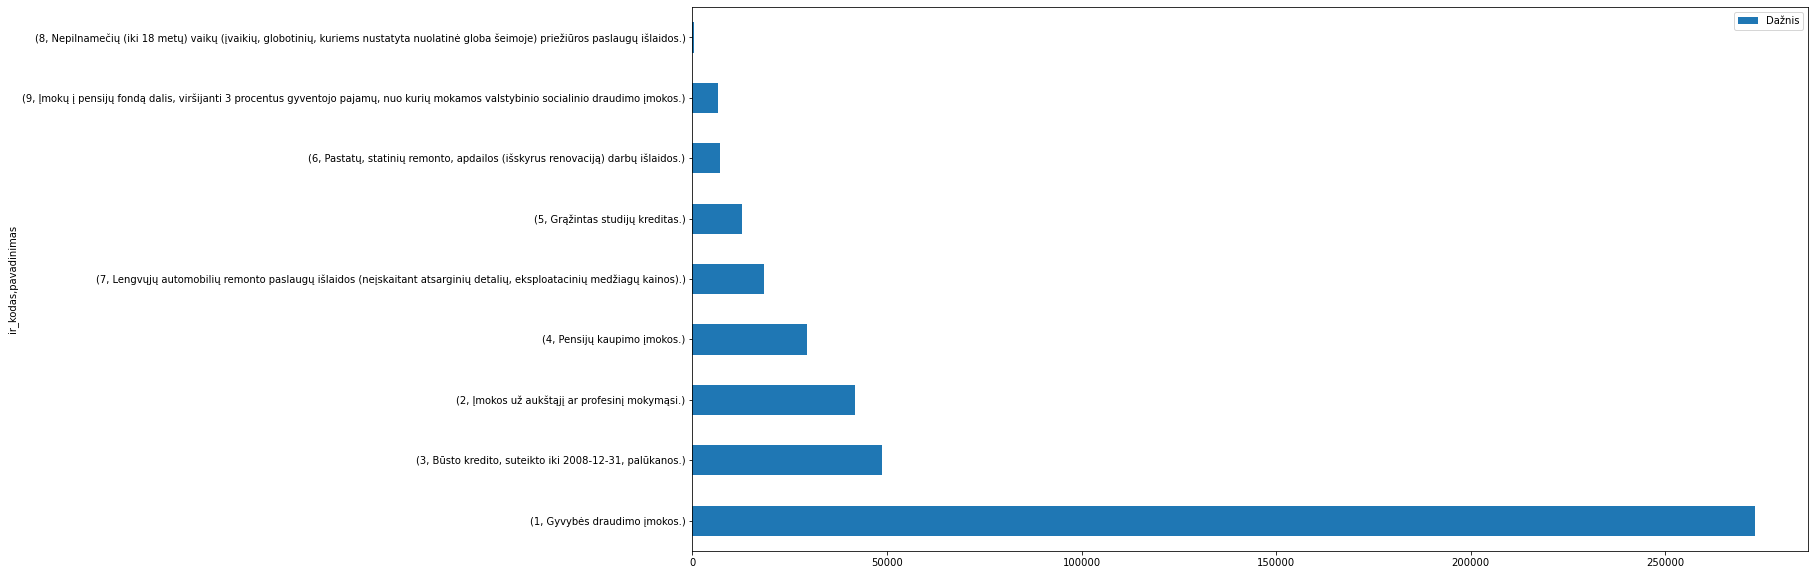

In [18]:
mpl.rc('figure', figsize=(20,10))
islaidos_dazniai=islaidos.value_counts(['ir_kodas','pavadinimas']).sort_values(ascending = False).to_frame()
islaidos_dazniai.plot.barh().legend(labels=['Dažnis'])

Diagramos matome, kad tarp išlaidų rūšių, kuriomis gali būti mažinamos gyventojų apmokestinamosios pajamos, akivaizdžiai pirmauja gyvybės draudimo įmokos.

Taip pat galime pažiūrėt, kaip bendrai yra pasiskirstę visos išlaidų rūšys.

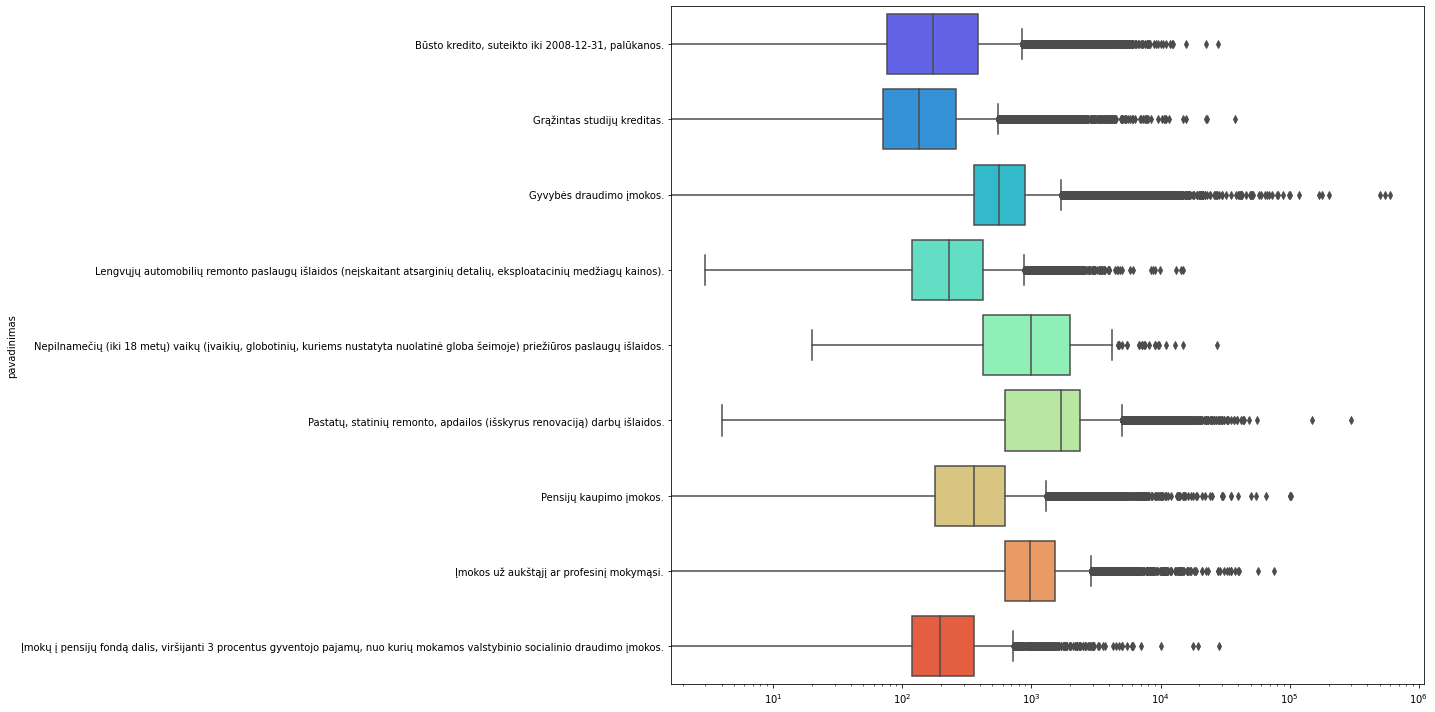

In [7]:
vienas = islaidos.set_index(['_id','pavadinimas'])['suma'].unstack() #.plot.box(logy = True)
fig, ax= plt.subplots(figsize=(20, 10))
ax.set_xscale('log')
g = sns.boxplot(data=vienas , palette='rainbow', orient="h", ax=ax)
plt.tight_layout()

Iš boxplot diagramų matome, kad "Gyvybės draudimo įmokos" turi labai daug išsiskiriančių reikšmių. Kyla klausimas dėl 60000 ribos duomenyse. Taip pat matome, kad didžiausią medianą turi "Pastatų, statinių remonto, apdailos (išskyrus renovaciją) darbų išlaidos, o labiausiai svyruojančios išlaidų sumos yra dėl "Būsto kredito, suteikto iki 2008-12-31, palūkanos" ir "Nepilnamečių (iki 18 metų) vaikų (įvaikių, globotinių, kuriems nustatyta nuolatinė globa šeimoje) priežiūros paslaugų išlaidos."

In [8]:
rūšis_islaidos = islaidos.loc[islaidos['pavadinimas'] == 'Gyvybės draudimo įmokos.']
count_row_visos = islaidos.shape[0] 
count_row_gd = rūšis_islaidos.shape[0]
def percentage(part, whole):
 Percentage = 100 * float(part)/float(whole)
 return str(Percentage)
percentage(count_row_gd, count_row_visos)

'62.331208272677074'

Skaičiuojant procentinę dalį pastebime, kad "Gyvybės draudimo įmokos" sudaro net 62 % visų išlaidų rūšių, kuriomis gali būti mažinamos gyventojų apmokestinamosios pajamos

Brėžiame diagramą, kuri vaizduoja "Gyvybės draudimo įmokos" sumas ir jų dažnius.

<AxesSubplot:ylabel='Frequency'>

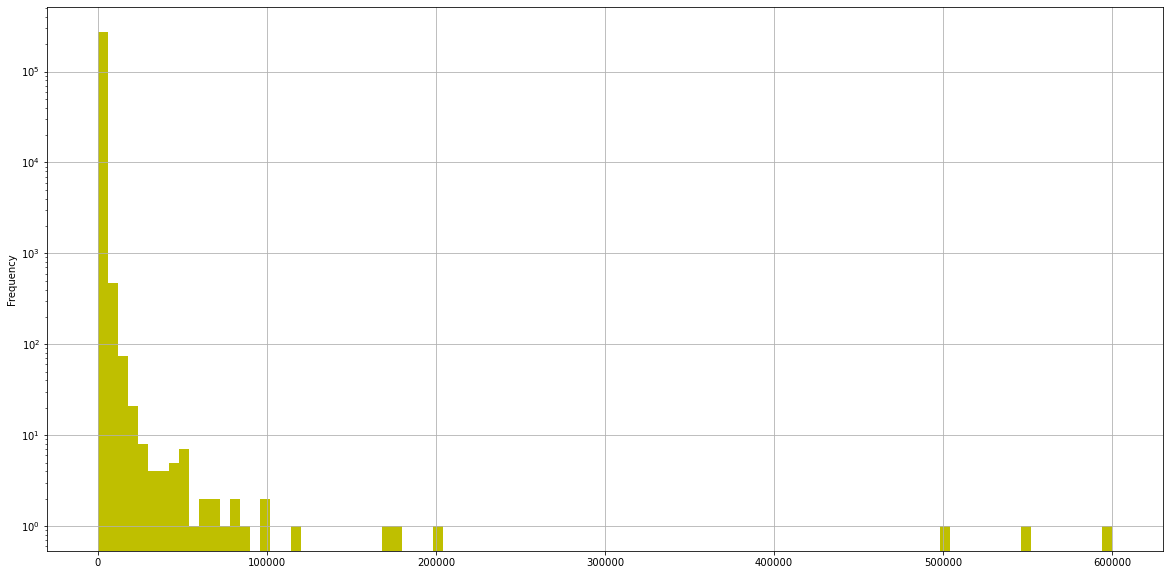

In [12]:
mpl.rc('figure', figsize=(20,10))
rūšis_islaidos['suma'].plot.hist(bins = 100, logy = True, color='y', grid = True)

Pastebime aiškiai išsiskiriančias reikšmes - pavieniai atvejai, kuomet "Gyvybės draudimo įmokos" sumos siekia 100000 ar net 600000.

In [174]:
islaidos_gyv_draud = islaidos.loc[islaidos['pavadinimas'] == 'Gyvybės draudimo įmokos.']
count_row = islaidos_gyv_draud.shape[0]
isl = islaidos_gyv_draud['suma'].nlargest(2732).to_frame()
m_isl = islaidos_gyv_draud['suma'].nsmallest(270442).to_frame()
count_row_visos = islaidos_gyv_draud.shape[0] 
count_row_gd = isl.shape[0]
def percentage(part, whole):
 Percentage = 100 * float(part)/float(whole)
 return str(Percentage)
percentage(count_row_gd, count_row_visos)

'1.0000951774326985'

Galime patikrinti pavyzdžiui kokią dalį iš visos "Gyvybės draudimo įmokos" išlaidų sumos sudaro 1 % daugiausiai sumokančių žmonių.

In [175]:
islaidos_all = islaidos_gyv_draud['suma'].sum()
islaidos_isl = isl['suma'].sum()
islaidos_m_isl = m_isl['suma'].sum()
count_row_visos = islaidos_all 
count_row_gd = islaidos_isl
def percentage(part, whole):
 Percentage = 100 * float(part)/float(whole)
 return str(Percentage)
percentage(count_row_gd, count_row_visos)

'8.71654039014792'

Matome, kad 1 % didžiausias įmokas sumokančių mokesčių mokėtojų išleidžiamos sumos gyvybės draudimui sudaro beveik 9 % visos šios rūšies išlaidų sumos.

# Vilniaus miesto ir Neringos savivaldybių išlaidų palyginimas

Norėdami palyginti savivaldybes tarpusavyje, pirmiausia turime jas normalizuoti pagal gyventojų skaičių. Tam nusiskaitome duomenis iš gyventojų registro apie Lietuvos gyventojų amžių ir lytį pagal savivaldybes

In [31]:
rc = pd.read_csv("data/datasets/gov/rc/gr/01_gr_open_amzius_lytis_pilietybes_sav_r1.csv")

Gyventojų registro (GR) duomenys apie Lietuvos Respublikos teritorijoje įregistruotus fizinius asmenis. GR duomenys apie Lietuvos gyventojų amžių ir lytį pagal savivaldybes. Duomenų geografinė imtis — visa šalies teritorija. Brandos lygis — III. Atnaujinimo dažnumas — kas 12 mėn. Duomenų formatas — CSV. Licencija — CC BY 4.0. Atvėrimo data — 2022-01-14
https://www.registrucentras.lt/p/1539
https://data.gov.lt/dataset/gyventoju-registro-duomenys-apie-lietuvos-gyventoju-amziu-ir-lyti-pagal-savivaldybes

In [195]:
# islaidos_sav=islaidos.groupby(['sav_kodas', 'sav_pavadinimas'])['suma'].sum().sort_values(ascending = False)
# islaidos_sav.head(10)

In [89]:
rc.head()

,nr,fiz_asm_lyt,fiz_asm_amzius,fiz_asm_pilietybe,deklarav_metai,deklarav_ketvirtis,sav_kodas,sav_pavadinimas,data_formav
0,1,V,55-64,Lietuvos,1981.0,K4,21,Klaipėdos m. sav.,2022-02-08
1,2,V,55-64,Lietuvos,2014.0,K1,75,Skuodo r. sav.,2022-02-08
2,3,V,35-44,Lietuvos,2018.0,K1,86,Švenčionių r. sav.,2022-02-08
3,4,M,35-44,Lietuvos,2007.0,K3,19,Kauno m. sav.,2022-02-08
4,5,M,65-84,Lietuvos,1986.0,K1,13,Vilniaus m. sav.,2022-02-08


In [48]:
rc.nunique()

nr                    3016572
fiz_asm_lyt                 2
fiz_asm_amzius              9
fiz_asm_pilietybe           3
deklarav_metai             80
deklarav_ketvirtis          4
sav_kodas                  60
sav_pavadinimas            60
data_formav                 1
dtype: int64

Pasirenkame palyginti būtent Neringos ir Vilniaus miesto savivaldybes, nes apskaičiavus visų išlaidų sumos medianą, paaiškėja, jog Neringos savivaldybėje išlaidų dydžiai yra aukščiausi. 

In [108]:
mediana = islaidos.groupby(['sav_pavadinimas'])['suma'].median().sort_values(ascending = False)
mediana.head().to_frame()

,suma
sav_pavadinimas,
Neringos sav.,615.0
Palangos m. sav.,559.0
Skuodo r. sav.,540.0
Birštono sav.,540.0
Pagėgių sav.,522.0


Todėl lyginame jas dalindami visų išlaidų rūšių bendras sumas iš toje savivaldybėje gyvenančių gyventojų skaičiaus, šiuos duomenis gauname iš gyventojų registro. 

In [168]:
vilnius = islaidos.loc[islaidos['sav_pavadinimas'] == 'Vilniaus m. sav.']
vilnius1 = rc.loc[rc['sav_pavadinimas'] == 'Vilniaus m. sav.']
is_viso_vilnius = vilnius1.shape[0]
vilnius_dal_2 = vilnius.groupby(['pavadinimas'])['suma'].sum()/(is_viso_vilnius)
vilnius_dal_2.to_frame()

,suma
pavadinimas,
"Būsto kredito, suteikto iki 2008-12-31, palūkanos.",10.442536
Grąžintas studijų kreditas.,1.798399
Gyvybės draudimo įmokos.,99.473558
"Lengvųjų automobilių remonto paslaugų išlaidos (neįskaitant atsarginių detalių, eksploatacinių medžiagų kainos).",3.172512
"Nepilnamečių (iki 18 metų) vaikų (įvaikių, globotinių, kuriems nustatyta nuolatinė globa šeimoje) priežiūros paslaugų išlaidos.",0.578828
"Pastatų, statinių remonto, apdailos (išskyrus renovaciją) darbų išlaidos.",13.485207
Pensijų kaupimo įmokos.,12.192533
Įmokos už aukštąjį ar profesinį mokymąsi.,20.416404
"Įmokų į pensijų fondą dalis, viršijanti 3 procentus gyventojo pajamų, nuo kurių mokamos valstybinio socialinio draudimo įmokos.",0.731968


In [183]:
neringa = islaidos.loc[islaidos['sav_pavadinimas'] == 'Neringos sav.']
neringa1 = rc.loc[rc['sav_pavadinimas'] == 'Neringos sav.']
is_viso_neringa = neringa1.shape[0]
neringa_dal_2 = neringa.groupby(['pavadinimas'])['suma'].sum()/(is_viso_neringa)
neringa_dal_2.to_frame()

,suma
pavadinimas,
"Būsto kredito, suteikto iki 2008-12-31, palūkanos.",24.978014
Grąžintas studijų kreditas.,2.251137
Gyvybės draudimo įmokos.,202.992987
"Lengvųjų automobilių remonto paslaugų išlaidos (neįskaitant atsarginių detalių, eksploatacinių medžiagų kainos).",4.307430
"Nepilnamečių (iki 18 metų) vaikų (įvaikių, globotinių, kuriems nustatyta nuolatinė globa šeimoje) priežiūros paslaugų išlaidos.",0.676080
"Pastatų, statinių remonto, apdailos (išskyrus renovaciją) darbų išlaidos.",17.137604
Pensijų kaupimo įmokos.,13.765732
Įmokos už aukštąjį ar profesinį mokymąsi.,41.267817
"Įmokų į pensijų fondą dalis, viršijanti 3 procentus gyventojo pajamų, nuo kurių mokamos valstybinio socialinio draudimo įmokos.",0.232942


Peržiūrėjus abi lenteles galime daryti išvadą, jog Neringos savivaldybėje gyvena turtingesni žmonės ir, kad ten pragyvenimas greičiausiai kainuoja daugiau, nei Vilniaus miesto savivaldybėje, kadangi beveik visos apskaičiuotos sumos Neringos savivaldybėje lenkia Vilniaus miesto savivaldybės išlaidas